In [4]:
import numpy as np
import matplotlib.pyplot as plt
import segpy
import bruges as b

%matplotlib inline
# comment out the following if you're not on a Mac with HiDPI display
%config InlineBackend.figure_format = 'retina'

In [23]:
def elastic_impedance(vp, vs, rho, alpha, scal=None, k=0.25):
    alpha = np.radians(alpha)
    a = 1 + (np.tan(alpha)) ** 2
    b = -8 * k * ((np.sin(alpha)) ** 2)
    c = 1 - 4 * k * ((np.sin(alpha)) ** 2)
    if scal==None:
        ei = vp**a * vs**b * rho** c
    else:
        vp0, vs0, rho0 = scal[0], scal[1], scal[2]
        ei = vp0*rho0 * ( (vp/vp0) ** a * (vs/vs0) ** b * (rho/rho0) ** c)
    return ei

In [49]:
ll=np.recfromcsv('qsiwell2_frm.csv')

z=ll['depth']
gr=ll['gr']

ip=ll['ip']
vp=ll['vp']
vs=ll['vs']
rho=ll['rho']


z1, z2 = 2100, 2150
f = (z>=z1) & (z<=z2)
# k = (np.nanmean(vs[f]) / np.nanmean(vp[f])) ** 2  # avg over interval of interest
scal=np.nanmean([vp[f], vs[f], rho[f]], axis=1)

ei = elastic_impedance(vp,vs,rho,30)
ei_norm = elastic_impedance(vp,vs,rho,30,scal)


# elastic_impedance1(3.500, 1.500, 2000, 30)
# elastic_impedance2(3.500, 1.500, 2000, 30, scal)



/Users/aadm/miniconda2/envs/snakes/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


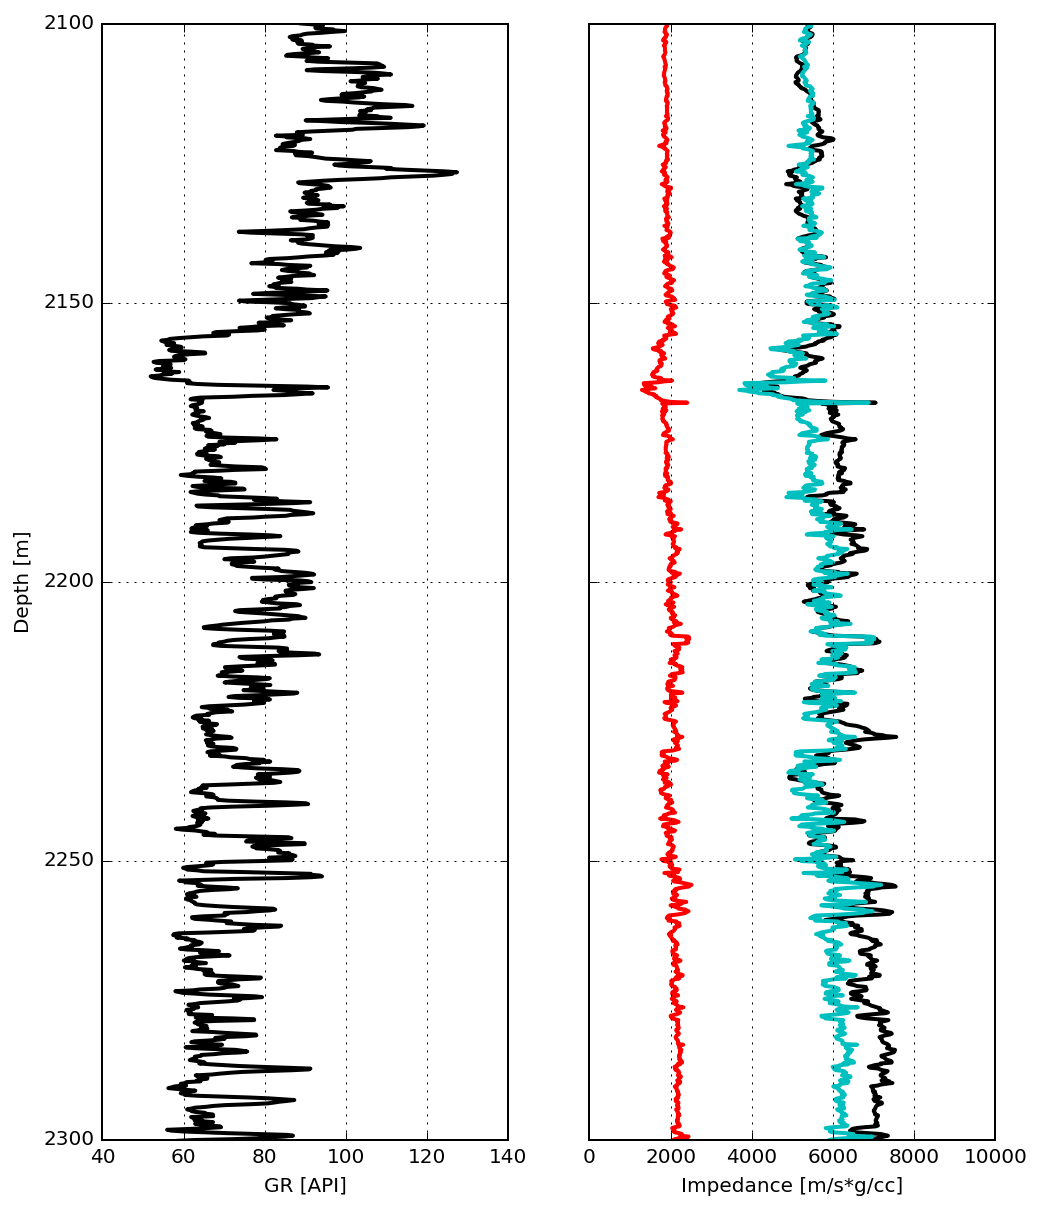

In [50]:
f, ax = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(8,10))
ax[0].plot(gr,z,'k',lw=2)
ax[1].plot(ip,z,'k',lw=2)
ax[1].plot(ei,z,'r',lw=2)
ax[1].plot(ei_norm,z,'c',lw=2)

ax[0].set_ylim(2100,2300)
ax[0].invert_yaxis()
ax[0].set_xlabel('GR [API]')
ax[1].set_xlabel('Impedance [m/s*g/cc]')
ax[0].set_ylabel('Depth [m]')
ax[1].locator_params(nbins=5, axis='x')
ax[0].grid(which='both')
ax[1].grid(which='both')
